In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Load the data
data = pd.read_csv('BankChurners.csv')

data.shape

(10127, 23)

In [3]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [74]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [75]:
data.dtypes

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

In [104]:
columns_to_drop = ['CLIENTNUM',
                   'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
                   'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
if isinstance(data, pd.DataFrame):
    data = data.drop(columns=[col for col in columns_to_drop if col in data.columns])
data.shape, data.columns

# dataset = data   # Create a copy of the data to work with it without modifying the original data

In [77]:
# objective columns
data[['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']]

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,Existing Customer,M,High School,Married,$60K - $80K,Blue
1,Existing Customer,F,Graduate,Single,Less than $40K,Blue
2,Existing Customer,M,Graduate,Married,$80K - $120K,Blue
3,Existing Customer,F,High School,Unknown,Less than $40K,Blue
4,Existing Customer,M,Uneducated,Married,$60K - $80K,Blue
...,...,...,...,...,...,...
10122,Existing Customer,M,Graduate,Single,$40K - $60K,Blue
10123,Attrited Customer,M,Unknown,Divorced,$40K - $60K,Blue
10124,Attrited Customer,F,High School,Married,Less than $40K,Blue
10125,Attrited Customer,M,Graduate,Unknown,$40K - $60K,Blue


In [78]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

data['Attrition_Flag'] = encoder.fit_transform(data['Attrition_Flag'])
data['Gender'] = encoder.fit_transform(data['Gender'])
data['Education_Level'] = encoder.fit_transform(data['Education_Level'])
data['Marital_Status'] = encoder.fit_transform(data['Marital_Status'])
data['Income_Category'] = encoder.fit_transform(data['Income_Category'])
data['Card_Category'] = encoder.fit_transform(data['Card_Category'])

data[['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']]



,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,1,1,3,1,2,0
1,1,0,2,2,4,0
2,1,1,2,1,3,0
3,1,0,3,3,4,0
4,1,1,5,1,2,0
...,...,...,...,...,...,...
10122,1,1,2,2,1,0
10123,0,1,6,0,1,0
10124,0,0,3,1,4,0
10125,0,1,2,3,1,0


In [79]:
data.dtypes

Attrition_Flag                int32
Customer_Age                  int64
Gender                        int32
Dependent_count               int64
Education_Level               int32
Marital_Status                int32
Income_Category               int32
Card_Category                 int32
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

# preprocessing

In [80]:
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,0,4,3,3,4,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


                          Attrition_Flag  Customer_Age  Gender  \
Attrition_Flag                      1.00         -0.02    0.04   
Customer_Age                       -0.02          1.00   -0.02   
Gender                              0.04         -0.02    1.00   
Dependent_count                    -0.02         -0.12    0.00   
Education_Level                    -0.01          0.00    0.00   
Marital_Status                     -0.02         -0.01   -0.00   
Income_Category                    -0.02         -0.01   -0.54   
Card_Category                       0.01         -0.02    0.08   
Months_on_book                     -0.01          0.79   -0.01   
Total_Relationship_Count            0.15         -0.01    0.00   
Months_Inactive_12_mon             -0.15          0.05   -0.01   
Contacts_Count_12_mon              -0.20         -0.02    0.04   
Credit_Limit                        0.02          0.00    0.42   
Total_Revolving_Bal                 0.26          0.01    0.03   
Avg_Open_T

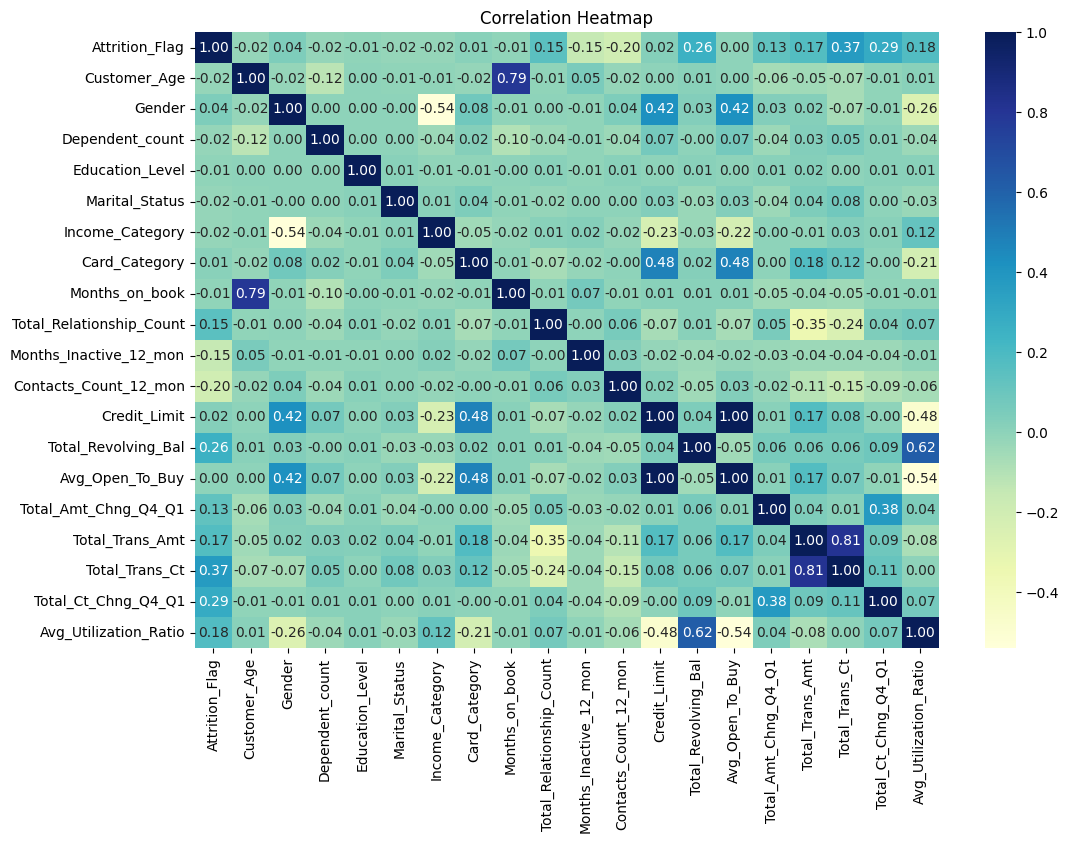

In [81]:
import seaborn as sb
import matplotlib.pyplot as mp

# Calculate correlation matrix
Corr_Matrix = round(data.corr(numeric_only=True), 2)
print(Corr_Matrix)

# Set the figure size before plotting
mp.figure(figsize=(12, 8))  # Width x Height in inches

# Plotting correlation heatmap
dataplot = sb.heatmap(Corr_Matrix, cmap="YlGnBu", annot=True, fmt=".2f")

# Add a title for clarity
mp.title("Correlation Heatmap")

# Displaying the heatmap
mp.show()

In [82]:
X = data.drop('Attrition_Flag', axis=1)
y = data['Attrition_Flag']
X = np.array(X)
y = np.array(y)

In [83]:
# X = X.reshape(-1, 1)
# y = y.reshape(-1, 1)

In [84]:
X, y

(array([[4.500e+01, 1.000e+00, 3.000e+00, ..., 4.200e+01, 1.625e+00,
         6.100e-02],
        [4.900e+01, 0.000e+00, 5.000e+00, ..., 3.300e+01, 3.714e+00,
         1.050e-01],
        [5.100e+01, 1.000e+00, 3.000e+00, ..., 2.000e+01, 2.333e+00,
         0.000e+00],
        ...,
        [4.400e+01, 0.000e+00, 1.000e+00, ..., 6.000e+01, 8.180e-01,
         0.000e+00],
        [3.000e+01, 1.000e+00, 2.000e+00, ..., 6.200e+01, 7.220e-01,
         0.000e+00],
        [4.300e+01, 0.000e+00, 2.000e+00, ..., 6.100e+01, 6.490e-01,
         1.890e-01]]),
 array([1, 1, 1, ..., 0, 0, 0]))

In [85]:
data['Attrition_Flag'].value_counts()

Attrition_Flag
1    8500
0    1627
Name: count, dtype: int64

In [86]:
# We separate the samples of the different classes
class_one_idx = np.argwhere(y==1)
class_zero_idx = np.argwhere(y==0)

class_one_x = np.squeeze(X[class_one_idx])
class_zero_x = np.squeeze(X[class_zero_idx])

print("Shape of class 0 samples: ", class_zero_x.shape)
print("Shape of class 1 samples: ", class_one_x.shape)

Shape of class 0 samples:  (1627, 19)
Shape of class 1 samples:  (8500, 19)


# resampling

In [87]:
from sklearn.utils import resample

# Upsample minority class
class_zero_upsampled = resample(class_zero_x, 
                                 replace=True,     # sample with replacement
                                 n_samples=8500,    # to match majority class
                                 random_state=123) # reproducible results

print("New shape of class 0 samples: ",class_zero_upsampled.shape)

# Downsample majority class
class_one_downsampled = resample(class_one_x, 
                                 replace=True,     # sample with replacement
                                 n_samples=1627,    # to match minority class
                                 random_state=123) # reproducible results

print("New shape of class 1 samples: ",class_one_downsampled.shape)

New shape of class 0 samples:  (8500, 19)
New shape of class 1 samples:  (1627, 19)


In [88]:
X_balanced = np.concatenate((class_zero_upsampled, class_one_x), axis=0)
print("(Upsampled) Balanced data set shape: ", X_balanced.shape)

X_balanced = np.concatenate((class_one_downsampled, class_zero_x), axis=0)
print("(Downsampled) Balanced data set shape: ", X_balanced.shape)

(Upsampled) Balanced data set shape:  (17000, 19)
(Downsampled) Balanced data set shape:  (3254, 19)


Normalize

In [89]:
from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# Z-score Normalisation with Standard Scaler from SKlearn: returns an nparray
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
scaler.fit(data)
data_scaled = scaler.transform(data)
columns_names = data.columns  # Define columns_names
data_scaled_df = pd.DataFrame(data_scaled, columns=columns_names)
data_scaled_df.head()


X

array([[4.500e+01, 1.000e+00, 3.000e+00, ..., 4.200e+01, 1.625e+00,
        6.100e-02],
       [4.900e+01, 0.000e+00, 5.000e+00, ..., 3.300e+01, 3.714e+00,
        1.050e-01],
       [5.100e+01, 1.000e+00, 3.000e+00, ..., 2.000e+01, 2.333e+00,
        0.000e+00],
       ...,
       [4.400e+01, 0.000e+00, 1.000e+00, ..., 6.000e+01, 8.180e-01,
        0.000e+00],
       [3.000e+01, 1.000e+00, 2.000e+00, ..., 6.200e+01, 7.220e-01,
        0.000e+00],
       [4.300e+01, 0.000e+00, 2.000e+00, ..., 6.100e+01, 6.490e-01,
        1.890e-01]])